In [ ]:
# user ID, order_date,购买产品数量，购买金额
# 数据时间：1997 - 1998 用户行为数据，约6万条

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']


In [3]:
# 导入数据
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt', names=columns, sep='\\s+') # sep='\s+':匹配任意一个空格
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()
# 用户平均每笔订单购买2，4个商品，标准差2.3，绝大多数购买量不多。
# 购买金额，大部分订单集中在中小额

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
#format参数：按照指定格式去匹配要转换的数据列
# %Y:四位的年份  %m：两位的月份  %d：两位的月份
df['month'] = df['order_date'].dt.month  # 提取月份为整数
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3)
memory usage: 2.9 MB


,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1
1,2,19970112,1,12.00,1997-01-12,1
2,2,19970112,5,77.00,1997-01-12,1
3,3,19970102,2,20.76,1997-01-02,1
4,3,19970330,2,20.76,1997-03-30,3


Text(0.5, 1.0, '每月的产品消费人数')

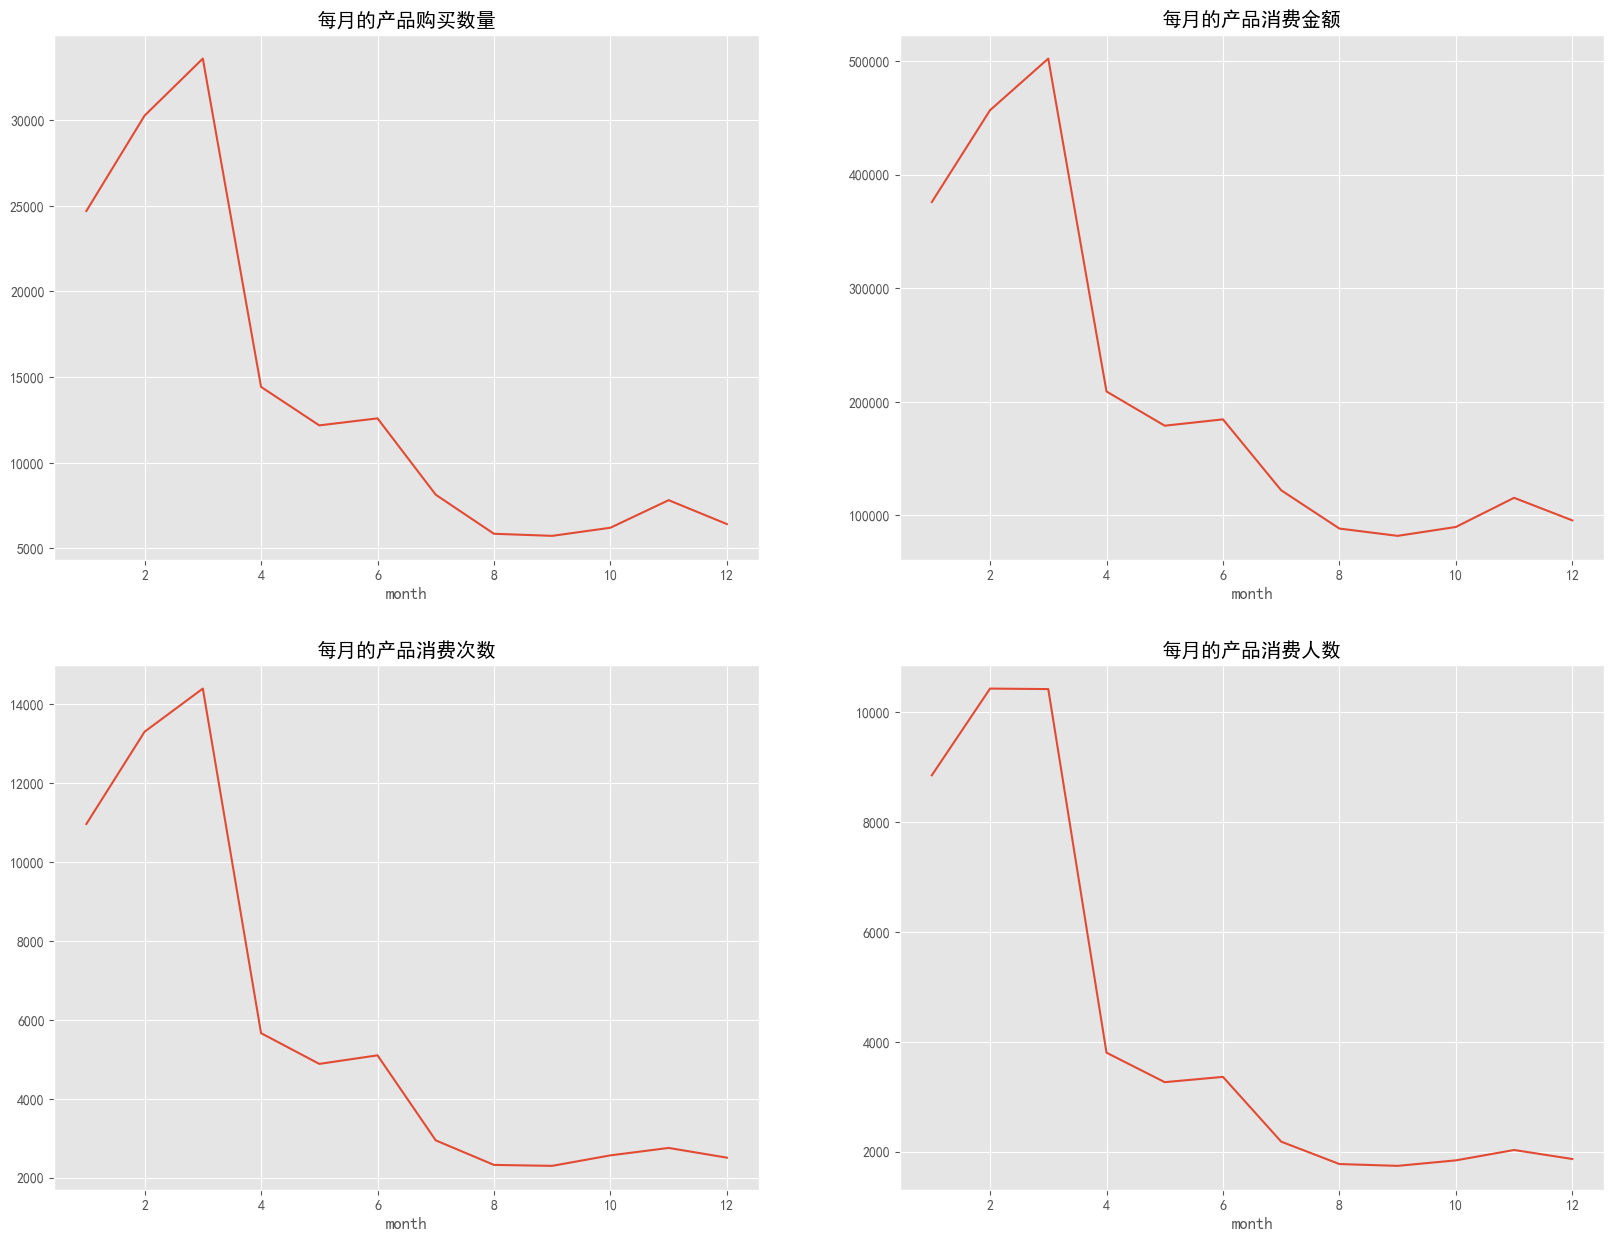

In [7]:
# 用户整体消费趋势分析（按月份）
# 按月份统计产品购买数量，消费金额，消费次数，消费人数

plt.figure(figsize=(20,15)) # 单位时英寸
#每月产品购买数量
plt.subplot(221) # 两行两列，占据第一个位置
df.groupby(by='month')['order_products'].sum().plot() # 默认折线图
plt.title('每月的产品购买数量')

#每月消费金额
plt.subplot(222) # 两行两列，占据第一个位置
df.groupby(by='month')['order_amount'].sum().plot() # 默认折线图
plt.title('每月的产品消费金额')

#每月消费次数
plt.subplot(223) # 两行两列，占据第一个位置
df.groupby(by='month')['user_id'].count().plot() # 默认折线图
plt.title('每月的产品消费次数')


#每月消费人数（根据user id去重统计，再计算个数）
plt.subplot(224) # 两行两列，占据第一个位置
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot() # 默认折线图
plt.title('每月的产品消费人数')


In [8]:
# 分析结果：
# 图一，前三个月销量高，而后严重下降，后趋于销量稳定，
# 图二 图三 图四都一样趋势

In [13]:
# 用户消费金额，消费次数（产品数量），描述统计
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
user_grouped = df.groupby(by='user_id')[numeric_columns].sum()
print(user_grouped.describe())
print('用户数量：', len(user_grouped))

# 从用户角度：用户数量23570个，每个用户平均购买7个CD，但中位数只有3，最大购买量为1033，平均值大于中位数，属于典型的右偏分布。
# 从消费金额角度：平均用户消费106，中位数43，并且有土豪用户13990，结合分位数和最大值，平均数与75%分位数几乎相等。
# 属于典型右偏分布，说明存在小部分用户高额消费，大部分还是小额消费

            user_id      order_dt  order_products  order_amount         month
count  2.357000e+04  2.357000e+04    23570.000000  23570.000000  23570.000000
mean   3.390107e+04  5.902627e+07        7.122656    106.080426     12.901273
std    6.235396e+04  9.460684e+07       16.983531    240.925195     28.710688
min    1.000000e+00  1.997010e+07        1.000000      0.000000      1.000000
25%    9.028250e+03  1.997021e+07        1.000000     19.970000      2.000000
50%    1.781750e+04  1.997032e+07        3.000000     43.395000      3.000000
75%    3.721050e+04  5.992125e+07        7.000000    106.475000     14.000000
max    3.154723e+06  4.334408e+09     1033.000000  13990.930000   1350.000000
用户数量： 23570


<Axes: xlabel='order_products', ylabel='order_amount'>

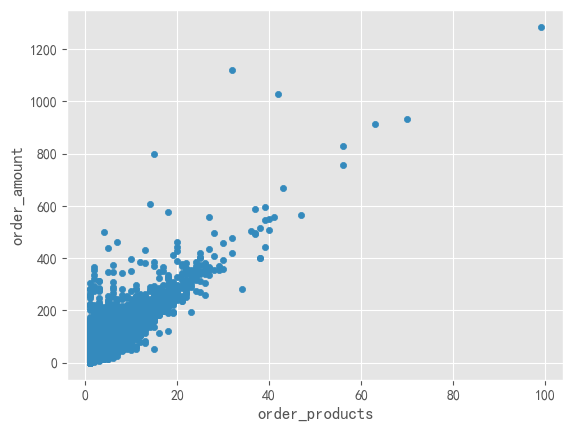

In [15]:
# 绘制基于每个用户的产品的购买量与消费金额散点图
df.plot(kind='scatter', x='order_products',y='order_amount')
# 从图中可知，用户消费总额与购买量呈线性趋势，可以看出每个商品均价在15元左右
# 订单的极值点比较少（消费金额大于1000，或者购买量大于60的），对于样本来说影响不大，可以忽略不计

<Axes: ylabel='Frequency'>

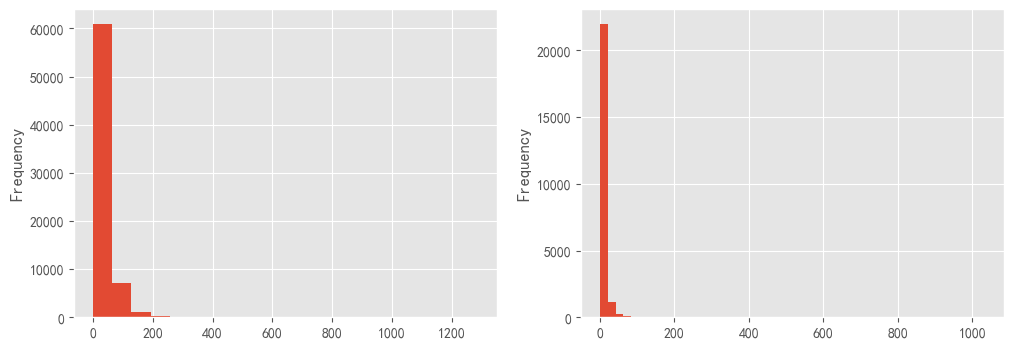

In [24]:
# 2. 用户消费分布
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist',bins=20) #bins:区间分数，影响柱子的宽度,值越大柱子越细。宽度=（列最大值-最小值）/bins

# 消费金额在100以内的订单占据了绝大多数

plt.subplot(122)
plt.xlabel('每个uid购买的数量')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=50)

# 图二可知，每个用户购买数量非常小，集中在50以内
# 两幅图得知，用户主要是低额消费，并且购买小于50的用户占大多数

In [27]:
# 用户累计消费金额占比，用户的贡献度
# 进行用户分组，取出消费金额，进行求和，排序，重置索引
user_cumsum=df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum


,user_id,order_amount
0,1101,0.00
1,1186,0.00
2,7897,0.00
3,7746,0.00
4,1225,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [29]:
# 每个用户消费金额累加
#累加器举例：
a=[1,2,3,4,5,6,7]
print(np.cumsum(a))

user_cumsum['amount_cumsum']=user_cumsum['order_amount'].cumsum()
user_cumsum.tail()

[ 1  3  6 10 15 21 28]


,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [35]:
# 消费金额最大值
amount_total = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1) # 前多少名用户的总贡献率
user_cumsum.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


<Axes: >

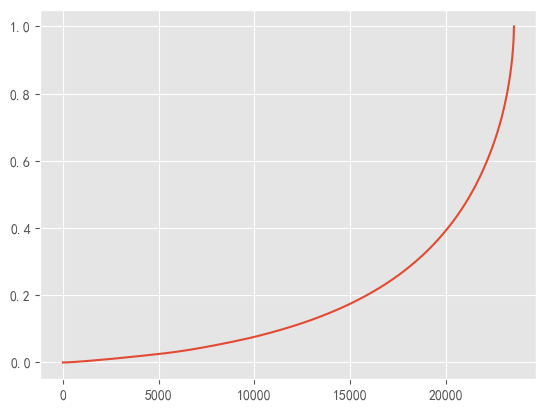

In [38]:
user_cumsum['prop'].plot()
# 前两万用户贡献40%。后3500名用户贡献60%，少部分用户贡献了大部分， 二八分布

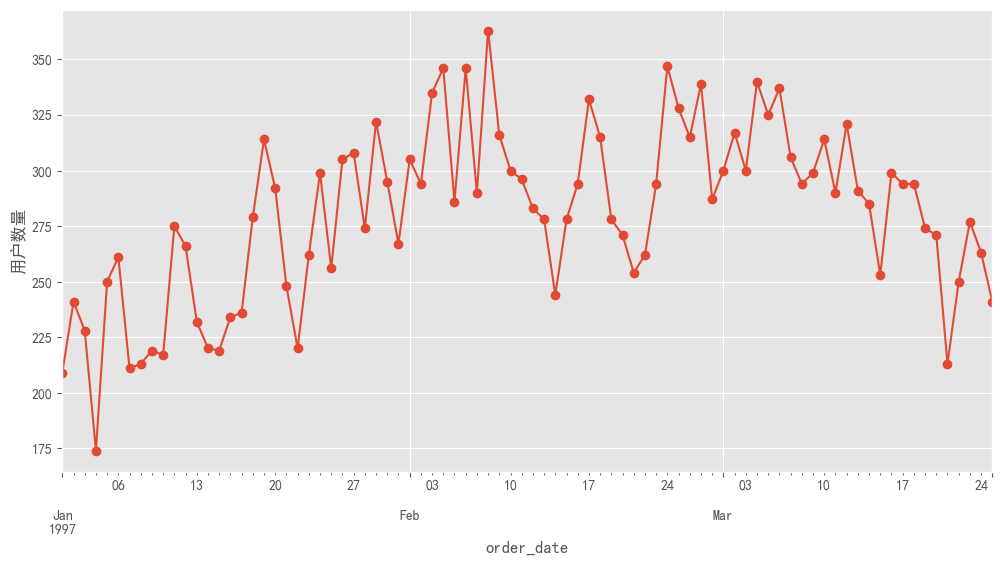

In [44]:
# 首购时间。
# 用户分组取最小值，即为首购时间
# df.groupby(by='user_id')['order_date'].min().value_counts().plot()

# 计算每个用户的首购时间
first_purchase = df.groupby(by='user_id')['order_date'].min()

# 按日期统计首购用户数量
first_purchase_counts = first_purchase.value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.xlabel('首购时间')  # 设置x轴标签
plt.ylabel('用户数量')  # 设置y轴标签
first_purchase_counts.plot(kind='line', marker='o')  # 绘制折线图，marker='o' 表示显示数据点

# 显示图形
plt.show()

# 由图知，首购用户在1月1号到2月10号呈明显上升趋势，后续逐步下降，猜测是产品推广力度下降或者价格折扣力度减小

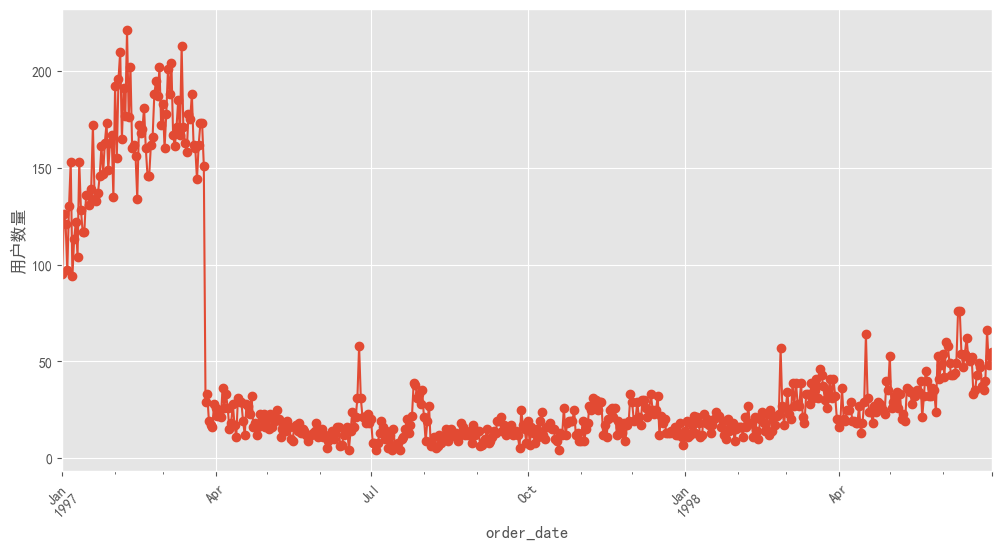

In [47]:
# 最后一次购买时间
#df.groupby(by='user_id')['order_date'].max().value_counts().plot()

# 计算每个用户的最后一次购买时间
last_purchase = df.groupby(by='user_id')['order_date'].max()

# 按日期统计最后一次购买的用户数量
last_purchase_counts = last_purchase.value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.xlabel('最后一次购买时间')  # 设置x轴标签
plt.ylabel('用户数量')  # 设置y轴标签
last_purchase_counts.plot(kind='line', marker='o')  # 绘制折线图，marker='o' 表示显示数据点

# 旋转x轴标签，避免重叠
plt.xticks(rotation=45)

# 显示图形
plt.show()

# 大多数用户最后一次购买时间集中在前三个月，说明缺少忠诚用户
# 随时间推移，最后一次购买商品用户量呈上升趋势。

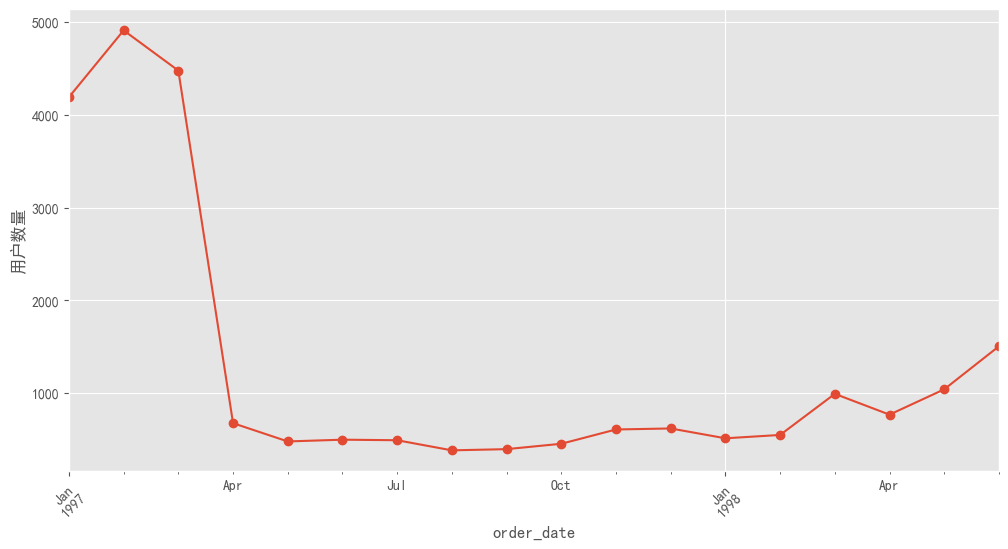

In [49]:
# 按月份汇总最后一次购买时间
last_purchase_monthly = last_purchase.dt.to_period('M').value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.xlabel('最后一次购买时间（按月）')
plt.ylabel('用户数量')
last_purchase_monthly.plot(kind='line', marker='o')

# 旋转x轴标签
plt.xticks(rotation=45)

# 显示图形
plt.show()

In [53]:
# 构建RFM模型
# 透视表的使用（index：相当于groupby，values：取出的数据列，aggfunc：key值必须存在于values列中）
rfm = df.pivot_table(index='user_id',
                    values=['order_products','order_amount','order_date'],
                    aggfunc={
                        'order_date':'max',# 最后一次购买
                        'order_products':'sum', # 购买产品的总数量
                        'order_amount':'sum' # 消费总金额
                    })

rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [58]:
# 用每个用户最后一次购买时间，减去日期列中最大值，最后转换成天数，保留一位小数
rfm['R']=-(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D') # 取相差的天数，保留一位小数
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [70]:
# RFM计算方式：每一列数据减去数据所在列的平均值，有正负，根据结果值与1作比较，如果>=1,设为1，否则为0
# 求平均值：rfm['R']-rfm['R'].mean()
def rfm_func(x):
    level = x.apply(lambda x: '1' if x>=1 else '0')
    label = level['R']+level['F']+level['M']
    d={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }

    result = d[label]
    return result

rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func, axis=1)
rfm.head()


,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户


Text(0, 0.5, 'R')

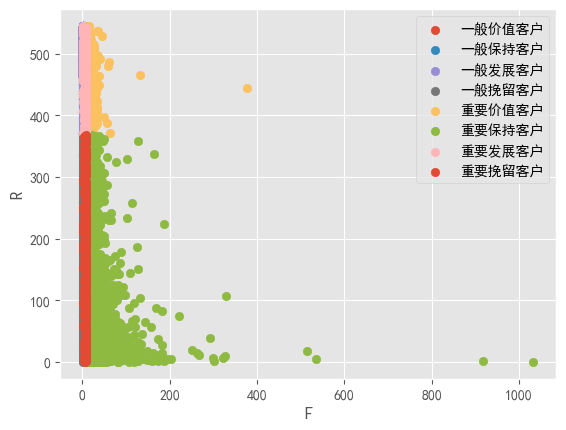

In [78]:
# 客户分层可视化
for label, grouped in rfm.groupby('label'):
    #print(label, grouped)
    x = grouped['F'] # 单个用户的购买数量
    y = grouped['R'] # 最近一次购买与98年7月相差天数
    plt.scatter(x,y,label=label)
plt.legend() #显示图例
plt.xlabel('F')
plt.ylabel('R')


In [81]:
pivoted_counts = df.pivot_table(
                    index='user_id',
                    columns='month',
                    values='order_dt',
                    aggfunc='count'
).fillna(0)

pivoted_counts

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# 由于浮点数不直观，并且需要转换成是否消费过即可，用0，1表示
#df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)
# apply: 作用于dataframe数据中的一行或者一列数据
# applymap:作用于dataframe数据，作用于每个元素
# map:本身是series函数，在df结构中无法使用map函数，map函数作用于series中每个元素


df_purchase = pivoted_counts  # 假设 pivoted_counts 是你的透视表

# 将 DataFrame 中的值转换为二进制：大于 0 的为 1，否则为 0
df_purchase = (df_purchase > 0).astype(int)

# 查看结果
df_purchase.head()



month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1
5,1,1,0,1,1,1,1,0,1,0,0,1


In [89]:
# 从新处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 从文件中读取数据
with open('CDNOW_master.txt', 'r', encoding='utf-8') as file:
    DOCUMENT = file.read()

# 清理和分割数据
data_lines = DOCUMENT.strip().split('\n')
data = [line.split() for line in data_lines]

# 创建 DataFrame
df = pd.DataFrame(data, columns=['user_id', 'date', 'month', 'amount'])

# 转换为适当的数据类型
df['user_id'] = df['user_id'].astype(str).str.zfill(5)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['month'] = df['month'].astype(int)
df['amount'] = df['amount'].astype(float)

# 查看前几行
print("DataFrame 前 5 行：")
print(df.head())



DataFrame 前 5 行：
  user_id       date  month  amount
0   00001 1997-01-01      1   11.77
1   00002 1997-01-12      1   12.00
2   00002 1997-01-12      5   77.00
3   00003 1997-01-02      2   20.76
4   00003 1997-03-30      2   20.76


In [90]:
# 检查缺失值
print("\n缺失值统计：")
print(df.isnull().sum())

# 验证 month 是否与 date 一致
df['date_month'] = df['date'].dt.month
inconsistent_months = df[df['month'] != df['date_month']]
print("\n与 date 不一致的 month 记录数：", len(inconsistent_months))
if not inconsistent_months.empty:
    print("示例：")
    print(inconsistent_months.head())

# 删除不一致的记录（如果需要）
df = df[df['month'] == df['date_month']].drop(columns=['date_month'])

# 检查金额的异常值
print("\n金额的统计信息：")
print(df['amount'].describe())
outliers = df[df['amount'] > df['amount'].quantile(0.99)]  # 检查前 1% 的高值
print("\n金额前 1% 的异常值：")
print(outliers)

# 去除可能的负值或零值（如果不合理）
df = df[df['amount'] > 0]


缺失值统计：
user_id    0
date       0
month      0
amount     0
dtype: int64

与 date 不一致的 month 记录数： 58457
示例：
  user_id       date  month  amount  date_month
2   00002 1997-01-12      5   77.00           1
3   00003 1997-01-02      2   20.76           1
4   00003 1997-03-30      2   20.76           3
5   00003 1997-04-02      2   19.54           4
6   00003 1997-11-15      5   57.45          11

金额的统计信息：
count    11202.000000
mean        29.529841
std         22.353430
min          0.000000
25%         14.370000
50%         24.940000
75%         37.907500
max        285.880000
Name: amount, dtype: float64

金额前 1% 的异常值：
      user_id       date  month  amount
1306    00387 1997-09-14      9  144.91
1307    00387 1997-11-23     11  163.89
1726    00499 1997-11-10     11  172.89
1991    00586 1997-06-05      6  118.61
2503    00730 1997-07-31      7  125.94
...       ...        ...    ...     ...
66292   22389 1997-04-03      4  150.32
66581   22492 1997-09-11      9  131.91
67640   22825 19


每个用户的购买次数（前 10）：
user_id
14048    26
07592    15
22061    12
07983    11
02484    10
19597    10
00619     9
04106     8
12476     8
01760     7
dtype: int64

每个用户的总消费金额（前 10）：
user_id
07592    954.13
14048    928.06
15162    605.30
19339    603.86
07983    524.58
08328    461.29
07801    449.08
13167    440.21
02798    405.67
16415    371.65
Name: amount, dtype: float64


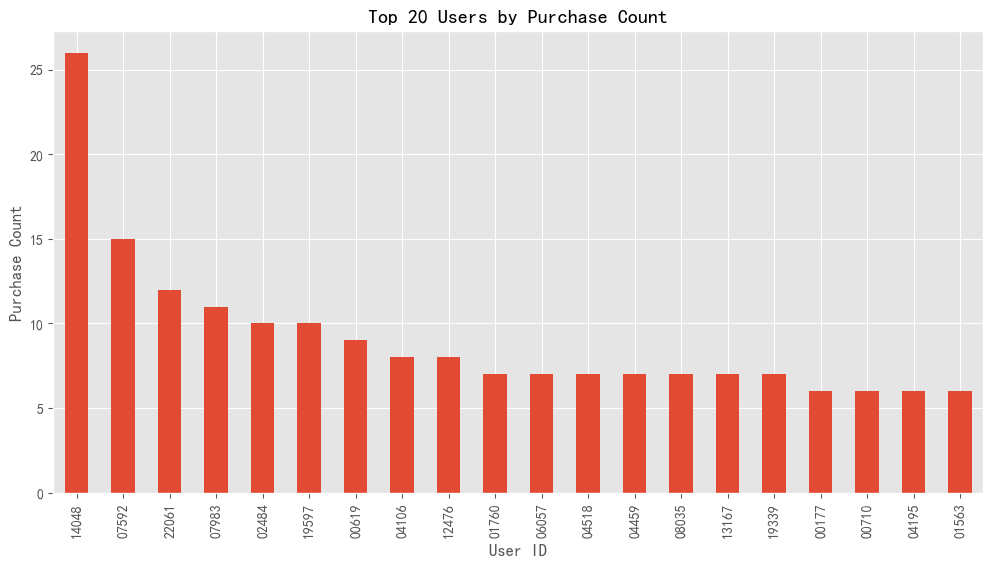

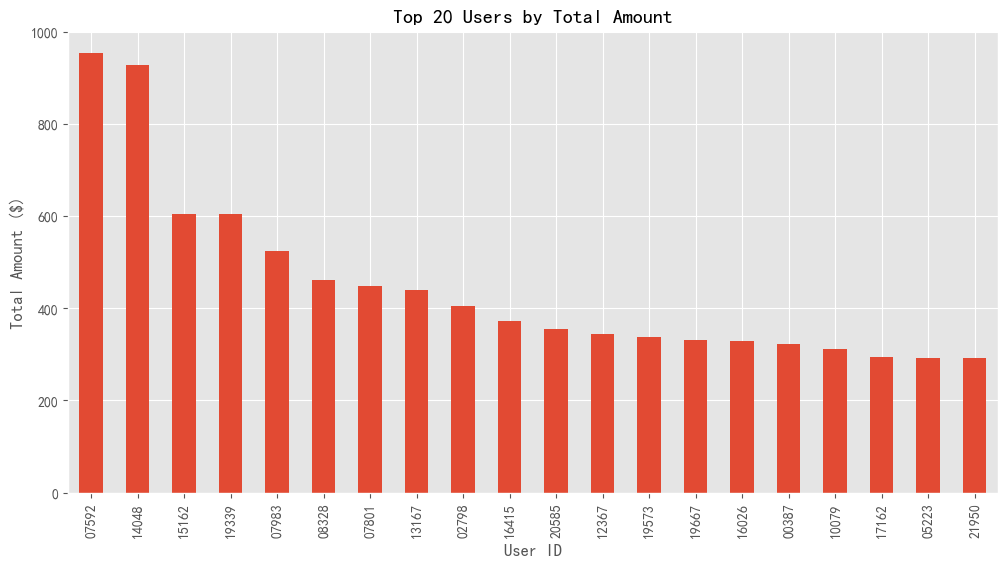

In [91]:
# 每个用户的购买次数
user_purchase_count = df.groupby('user_id').size().sort_values(ascending=False)
print("\n每个用户的购买次数（前 10）：")
print(user_purchase_count.head(10))

# 每个用户的总消费金额
user_total_amount = df.groupby('user_id')['amount'].sum().sort_values(ascending=False)
print("\n每个用户的总消费金额（前 10）：")
print(user_total_amount.head(10))

# 可视化
plt.figure(figsize=(12, 6))
user_purchase_count.head(20).plot(kind='bar')
plt.title('Top 20 Users by Purchase Count')
plt.xlabel('User ID')
plt.ylabel('Purchase Count')
plt.show()

plt.figure(figsize=(12, 6))
user_total_amount.head(20).plot(kind='bar')
plt.title('Top 20 Users by Total Amount')
plt.xlabel('User ID')
plt.ylabel('Total Amount ($)')
plt.show()

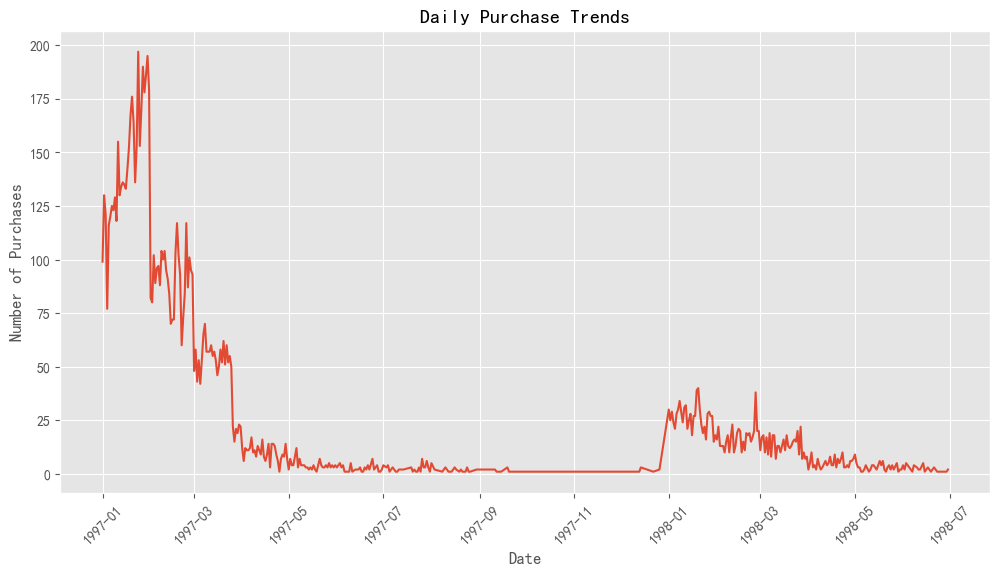

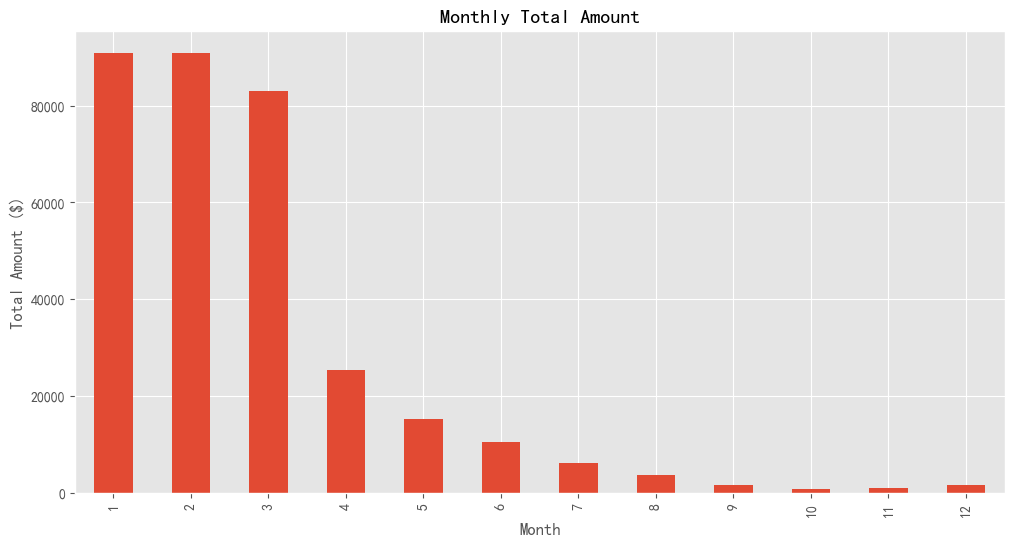

In [92]:
# 按日期的购买次数
daily_purchases = df.groupby(df['date'].dt.date).size()
plt.figure(figsize=(12, 6))
daily_purchases.plot()
plt.title('Daily Purchase Trends')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# 按月份的购买金额
monthly_amount = df.groupby(df['date'].dt.month)['amount'].sum()
plt.figure(figsize=(12, 6))
monthly_amount.plot(kind='bar')
plt.title('Monthly Total Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount ($)')
plt.show()

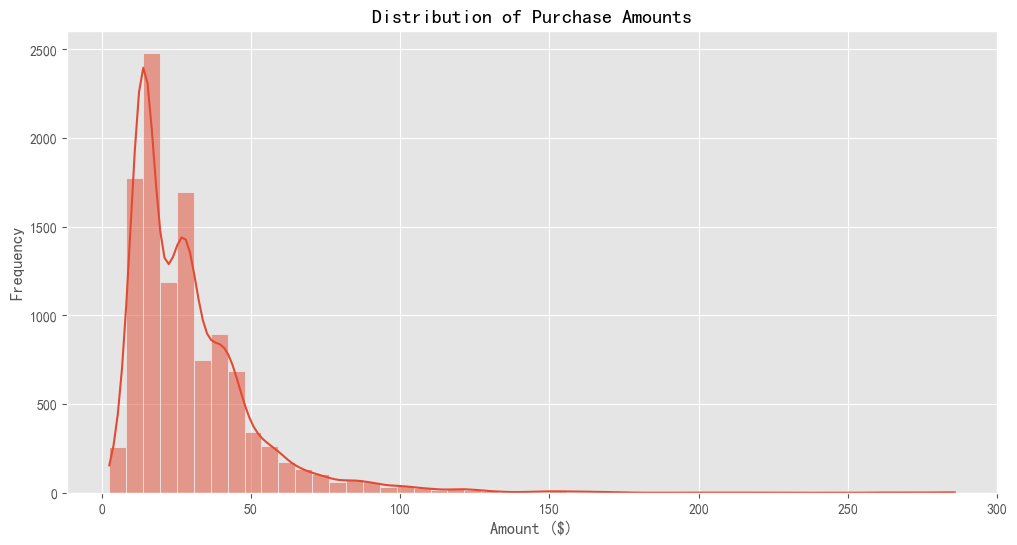

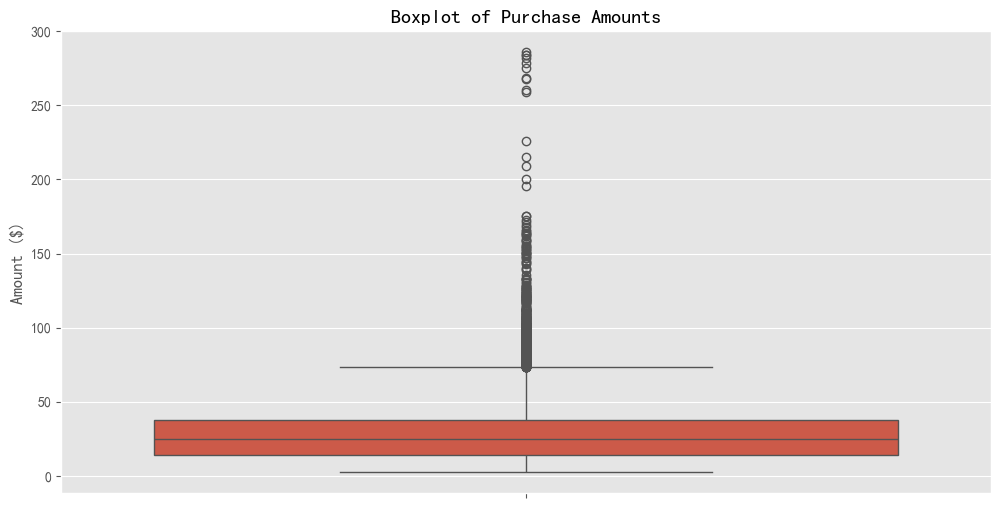

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['amount'])
plt.title('Boxplot of Purchase Amounts')
plt.ylabel('Amount ($)')
plt.show()

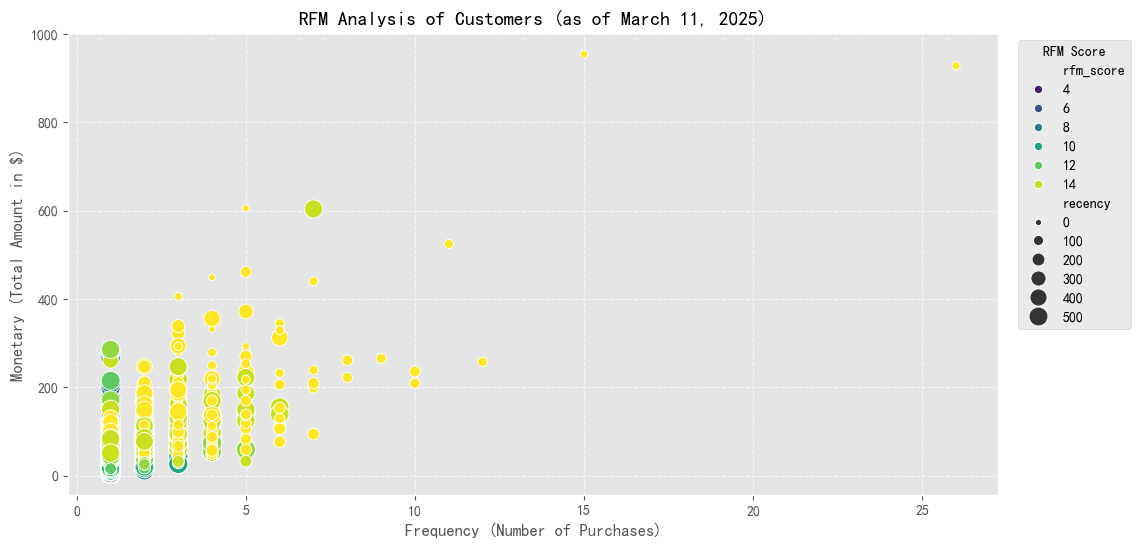


RFM 表前 10 行（单位：Recency=天, Frequency=次数, Monetary=美元）：
         recency  frequency  monetary recency_score frequency_score  \
user_id                                                               
00001        545          1     11.77             1               1   
00002        534          1     12.00             1               1   
00005        532          1     13.97             1               1   
00006        545          1     20.99             1               1   
00008        545          1      9.77             1               1   
00011        518          2     32.79             2               5   
00016        545          1      9.77             1               1   
00018        542          1     14.96             1               1   
00021        533          1     11.77             1               1   
00022        545          1     14.37             1               1   

        monetary_score  rfm_score  
user_id                            
00001               

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据已加载到 df（请确保先运行数据加载代码）
# 这里直接使用之前加载的 df 进行 RFM 分析

# 计算 RFM
latest_date = df['date'].max()
rfm_table = df.groupby('user_id').agg({
    'date': lambda x: (latest_date - x.max()).days,  # Recency（天）
    'user_id': 'count',  # Frequency（次数）
    'amount': 'sum'  # Monetary（美元）
}).rename(columns={'date': 'recency', 'user_id': 'frequency', 'amount': 'monetary'})

# 标准化并分段
rfm_table['recency_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm_table['frequency_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm_table['monetary_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# 计算 RFM 总分
rfm_table['rfm_score'] = (rfm_table['recency_score'].astype(int) + 
                         rfm_table['frequency_score'].astype(int) + 
                         rfm_table['monetary_score'].astype(int))

# 创建散点图
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=rfm_table, 
                         x='frequency', 
                         y='monetary', 
                         hue='rfm_score', 
                         size='recency', 
                         sizes=(20, 200),  # 控制点的大小范围
                         palette='viridis')  # 使用颜色渐变

# 添加单位和标签
plt.title('RFM Analysis of Customers (as of March 11, 2025)', fontsize=14)
plt.xlabel('Frequency (Number of Purchases)', fontsize=12)
plt.ylabel('Monetary (Total Amount in $)', fontsize=12)
plt.legend(title='RFM Score', loc='upper right', bbox_to_anchor=(1.15, 1))

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图表
plt.show()

# 打印部分数据以便参考
print("\nRFM 表前 10 行（单位：Recency=天, Frequency=次数, Monetary=美元）：")
print(rfm_table.head(10))


关联规则（置信度 > 0.5）：
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


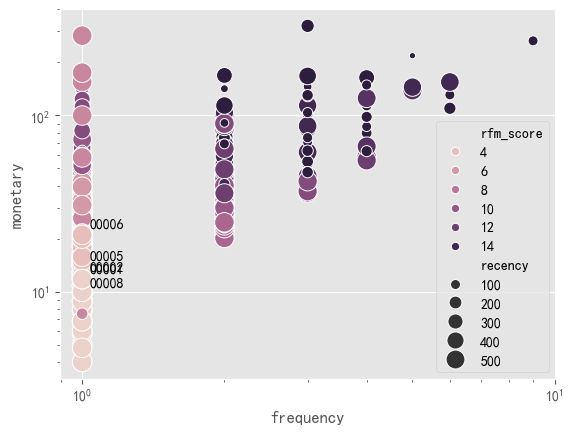

In [103]:
from mlxtend.frequent_patterns import apriori, association_rules

# 转换为 one-hot 编码
pivot_df = df.pivot_table(index='user_id', columns='month', values='amount', aggfunc='count', fill_value=0).astype(bool)

# 应用 Apriori 算法
frequent_itemsets = apriori(pivot_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("\n关联规则（置信度 > 0.5）：")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 过滤数据：如果数据点过多，可以只显示前 1000 个用户：
rfm_subset = rfm_table.head(1000)
scatter = sns.scatterplot(data=rfm_subset, x='frequency', y='monetary', hue='rfm_score', size='recency', sizes=(20, 200))

# 添加注解：为几个关键点添加用户 ID 标签：
for i, row in rfm_table.head(5).iterrows():
    plt.annotate(i, (row['frequency'], row['monetary']), xytext=(5, 5), textcoords='offset points')

# 调整比例：如果金额或频率范围过大，可以使用对数刻度：
plt.xscale('log')
plt.yscale('log')



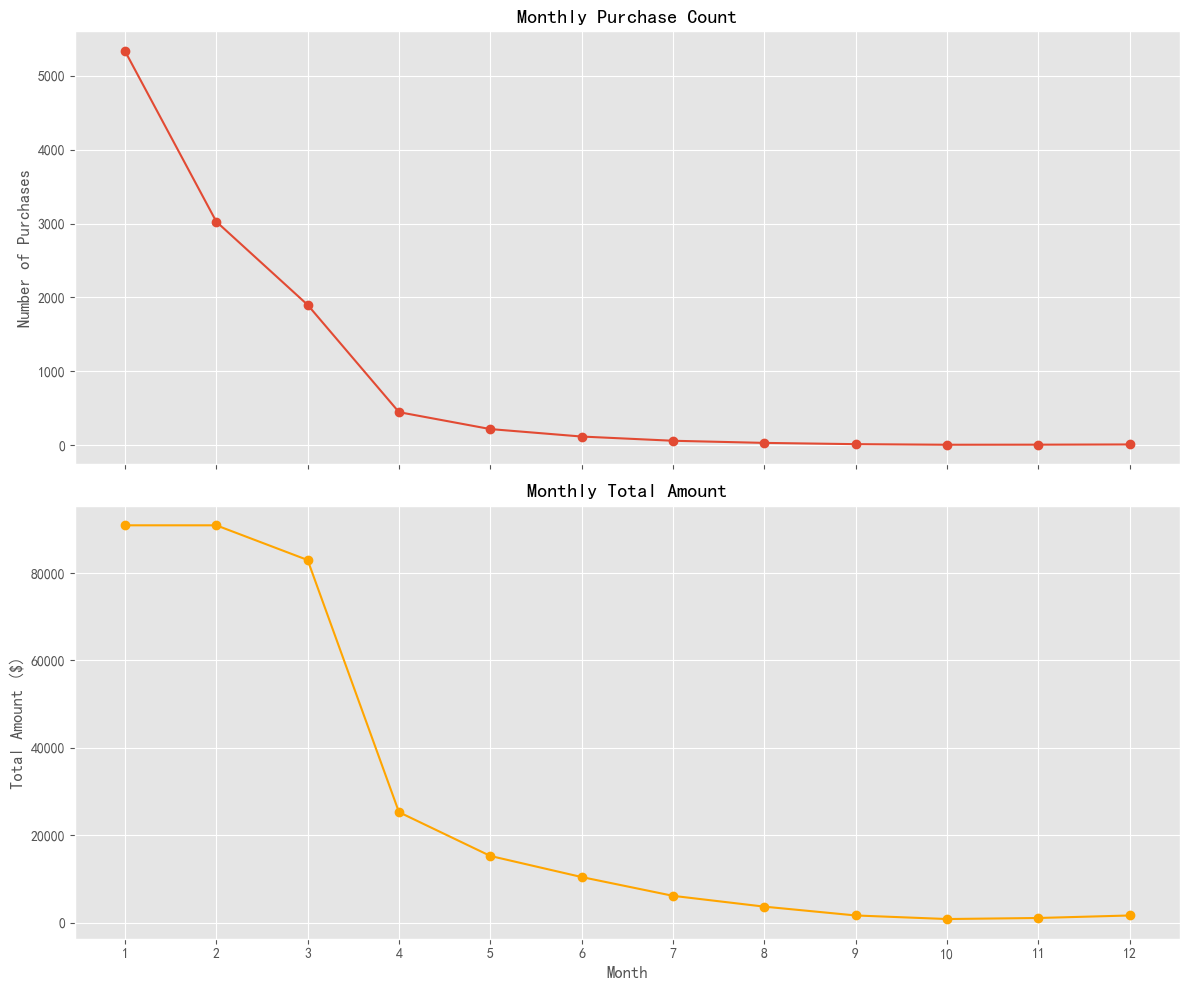


每个月份的平均单笔金额（美元）：
date
1      17.039850
2      30.041305
3      43.690147
4      56.554474
5      70.030092
6      89.222650
7     102.390667
8     118.355806
9     118.088571
10    139.316667
11    153.747143
12    164.980000
Name: amount, dtype: float64


In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 按月份聚合购买次数和金额
monthly_purchases = df.groupby(df['date'].dt.month).size()
monthly_amount = df.groupby(df['date'].dt.month)['amount'].sum()

# 可视化
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 购买次数
ax1.plot(monthly_purchases.index, monthly_purchases.values, marker='o')
ax1.set_title('Monthly Purchase Count')
ax1.set_ylabel('Number of Purchases')
ax1.grid(True)

# 消费金额
ax2.plot(monthly_amount.index, monthly_amount.values, marker='o', color='orange')
ax2.set_title('Monthly Total Amount')
ax2.set_ylabel('Total Amount ($)')
ax2.set_xlabel('Month')
ax2.grid(True)

plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# 统计每个月份的平均单笔金额
monthly_avg_amount = df.groupby(df['date'].dt.month)['amount'].mean()
print("\n每个月份的平均单笔金额（美元）：")
print(monthly_avg_amount)

C:\Users\sheng\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.tight_layout()


<Figure size 1200x1000 with 0 Axes>

C:\Users\sheng\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


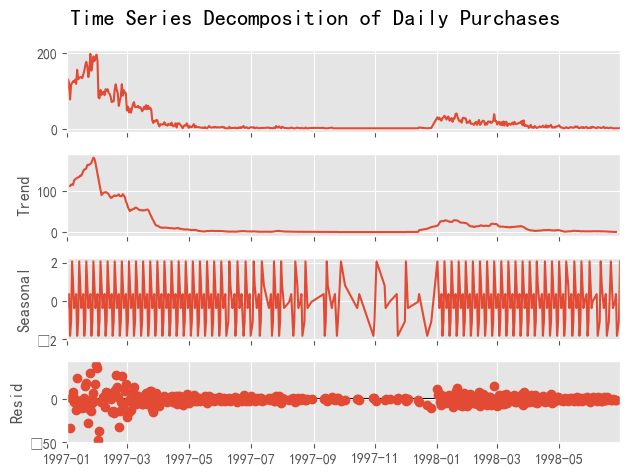

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 按日期聚合购买次数
daily_purchases = df.groupby(df['date'].dt.date).size()

# 时间序列分解（假设每周季节性）
decomposition = seasonal_decompose(daily_purchases, model='additive', period=7)

# 可视化
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Daily Purchases', fontsize=16)
plt.tight_layout()
plt.show()

In [113]:
#在Power BI可视化前，先清洗数据
with open('CDNOW_master.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

with open('CDNOW_master_cleaned.txt', 'w', encoding='utf-8') as file:
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 4:  # 确保有 4 个字段
            user_id, date_str, quantity, amount = parts
            # 检查 date 是否为 8 位数字，且是有效日期
            if (len(date_str) == 8 and date_str.isdigit()):
                try:
                    year, month, day = int(date_str[:4]), int(date_str[4:6]), int(date_str[6:8])
                    if 1 <= month <= 12 and 1 <= day <= 31:  # 简单验证日期有效性
                        file.write(' '.join(parts) + '\n')
                except ValueError:
                    continue